In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri, index_col=[0])
dados.head()

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes


In [2]:
renomear = {
  'mileage_per_year' : 'milhas_por_anos',
  'model_year' : "ano_modelo",
  'price' : 'preco',
  'sold' : 'vendido'
  }

dados = dados.rename(columns=renomear)
dados.head(10)

,milhas_por_anos,ano_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes
5,14661,2007,55405.26,yes
6,9990,2002,93415.61,yes
7,11599,2008,65265.09,no
8,7834,1999,43917.53,yes
9,14913,2003,107860.41,yes


In [3]:
dados.vendido = dados.vendido.map({'no' : 0, 'yes' : 1})
dados

,milhas_por_anos,ano_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1
...,...,...,...,...
9995,15572,2006,97112.86,0
9996,13246,2002,107424.63,1
9997,13018,2014,93856.99,0
9998,10464,2011,51250.57,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados.ano_modelo
dados

,milhas_por_anos,ano_modelo,preco,vendido,idade_do_modelo
0,21801,2000,30941.02,1,20
1,7843,1998,40557.96,1,22
2,7109,2006,89627.50,0,14
3,26823,2015,95276.14,0,5
4,7935,2014,117384.68,1,6
...,...,...,...,...,...
9995,15572,2006,97112.86,0,14
9996,13246,2002,107424.63,1,18
9997,13018,2014,93856.99,0,6
9998,10464,2011,51250.57,1,9


In [5]:
dados['km_por_ano'] = dados.milhas_por_anos * 1.60934
dados

,milhas_por_anos,ano_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,21801,2000,30941.02,1,20,35085.22134
1,7843,1998,40557.96,1,22,12622.05362
2,7109,2006,89627.50,0,14,11440.79806
3,26823,2015,95276.14,0,5,43167.32682
4,7935,2014,117384.68,1,6,12770.11290
...,...,...,...,...,...,...
9995,15572,2006,97112.86,0,14,25060.64248
9996,13246,2002,107424.63,1,18,21317.31764
9997,13018,2014,93856.99,0,6,20950.38812
9998,10464,2011,51250.57,1,9,16840.13376


In [6]:
dados = dados.drop(columns=['milhas_por_anos', 'ano_modelo'], axis=1) #axis especifica se é linha ou coluna
dados

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290
...,...,...,...,...
9995,97112.86,0,14,25060.64248
9996,107424.63,1,18,21317.31764
9997,93856.99,0,6,20950.38812
9998,51250.57,1,9,16840.13376


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos \n" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%% \n\n" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos 

A acurácia foi 58.00% 




/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
#saber se a acurácia foi boa ou ruim

from sklearn.dummy import DummyClassifier

dummy_straified = DummyClassifier()
dummy_straified.fit(treino_x, treino_y)

acuracia = dummy_straified.score(teste_x, teste_y) * 100
acuracia

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


52.44

In [9]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100
acuracia

57.99999999999999

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
#dados raw (crus) que ainda não foram re-escalados
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#escalando
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

# nesse tipo de algoritmo, é difícil entender o motivo das decisões que estão sendo tomadas
# conhecido como "blackbox"

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [17]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

modelo = DecisionTreeClassifier(max_depth=2) #máximo de profundidade de 2 "galhos" na árvore, para facilitar a visualização
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x) #na árvore de decisão, não é necessário re-escalar os dados

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

# nesse tipo de algoritmo, é difícil entender o motivo das decisões que estão sendo tomadas
# conhecido como "blackbox"

A acurácia foi 76.84%


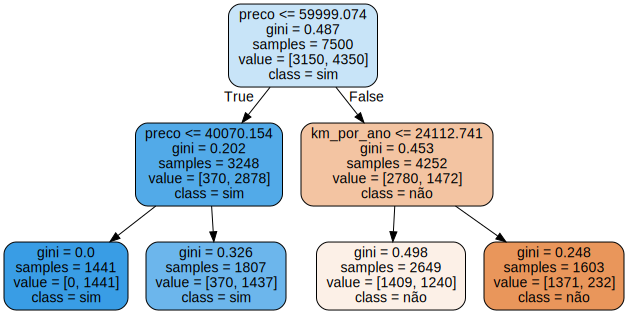

In [18]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, feature_names = x.columns, 
                           filled=True, rounded=True, #aparência
                           class_names=["não","sim"]) 
grafico = graphviz.Source(dot_data)
grafico